# Class 7 - Data Visualization and Plotting
Data visualization is an extremely useful tool in both analysing the data and in presenting the findings. Humans are visual creatures, and we are very quick to pick out patterns (or at least things that seem like patterns). Luckily, Python has many libraries that make plotting a very easy process. The most popular libraries used in data analysis include
- `matplotlib`
- `pandas`
- `seaborn`

The library `matplotlib` is the library that provides the most granular control of the graphics created, with both `pandas` and `seaborn` building wrappers around the functionality of `matplotlib` and defining presets and defaults for various types of graphs that look better than those in `matplotlib`. We'll lighlty go over each of these options. We'll mostly go over some functionality of matplotlib and pandas.

## Matplotlib
As mentioned before, `matplotlib` contains a lot of options for very fine control of the way that your plot looks, but this does require a lot of code. We'll start with the basics, however.

Any functionality that we cover can be found in the `pyplot` subpackage of `matplotlib`. Let's import that with the traditional alias `plt`. While we're at it, let's go ahead and read in some stock data for Facebook in 2018.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/master/ch_05/data/fb_stock_prices_2018.csv',
    index_col='date',
    parse_dates=True
)

In [16]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


The simplest plot that we could make is that of a line plot. Since how this is series data, a linear sequence of plotted values makes appropriate sense. We can plot that by running

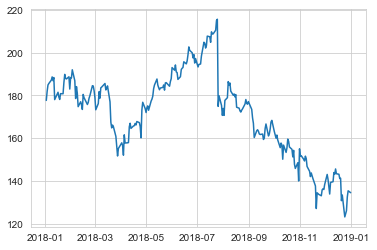

In [4]:
plt.plot(fb.index, fb.open)
plt.show()

*Note: The way that his graph presents itself depends wildly on the environment you are using. Running the above two lines of code in a repl or in an executed python file will open a new window for the graph and pause the code until that window is closed. However, some IDEs actually ignore this, allowing the rest of the code to execute with the window still open. However, in this jupyter notebook, the graph is saved to the display of the page, and allows us to run the rest of the cells. Be aware of what environment you are using and how you are opening the graphs.*

In the simple `plot` function call, we passed in the `x` coordinate, the `y` coordinate, and nothing else. This produced a very simple line graph with not much other than the data itself. The `show` function call takes the graph from memory and displays it, destroying the object that was in memory in the process. Note that because we have not saved the plot to a variable, it is gone until we recreate it.

In [17]:
plt.show()

One nice feature of jupyter notebooks specifically is that we don't always have to call the `show` function to get the graph to display on the screen.

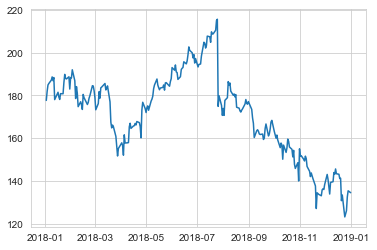

In [18]:
plt.plot(fb.index, fb.open)

If this doesn't work for some reason, try running `%matplotlib inline`. Running this command in my notebook didn't make any difference. It seems my environment was already assuming it to be true.

We can also use plot to draw a scatter plot by passing in an additional style argument. This style argument follows the pattern '[color][marker][linestyle]' Let's plot the highs of the stock market data vs the lows.

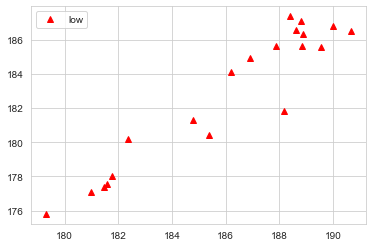

In [22]:
plt.plot('high', 'low', 'r^', data=fb.head(20))
plt.legend()

Passing in the dataframe into the `data` argument allowed us to only pass in the column names into the x and y positions. In the style string, `r` turned the plot to red, and the `o` plotted the data as dots. There are many combinatios that can be created and there is some documentation aobut the different lines, markers, and colors that you can use to create plots in (their documentation)[https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html] in the section labeled Notes. We'll use a variety of them in this document.

Let's switch datasets and plot a histogram.

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

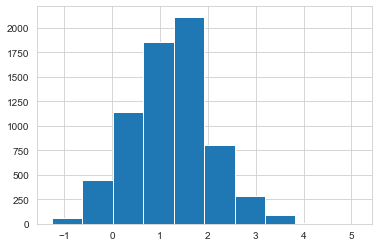

In [23]:
quakes = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/master/ch_05/data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

Remember that when plotting, the exact specifications of the plot will dramatically alter the way that it is perceived. Below, we are going to plot 2 graphs side by side using `subplots`. This is going to allow (for this example) to this data with different parameters. This subplot method could absolutely be used to plot completely different sets of data side by side.

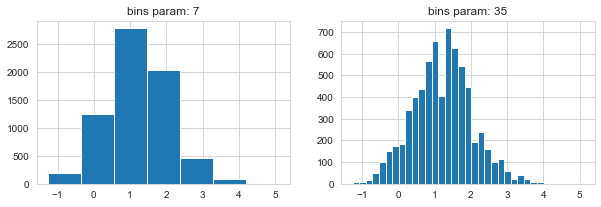

In [24]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10,3))
for ax, bins, in zip(axes, [7,35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

Notice that the shape of both of the following plots is different from the in the plot with 10 bins, we have 2 as the largest bin, but with 7, 1 is the largest bin. Alternatively, with 35 bins, we see something that looks a little more bimodal.

In the above example we used a bit of functionality that we haven't discussed yet.
- `subplot` allows us to pass in the number of rows and columns that we want, as well as the size of the figure as a whole. This returned the objects `Figure` and `Axes` objects, which we save into the `fig` and `axes` variables.
- Many of the `pyplot` functions have also been implemented as methods of these objects. Therefore, we can call things like `ax.plot` or  in our case `ax.hist` to create plots in each of the subplots of our figure.
- We used the method `set_title`, which as the name suggests, sets the title for the subplot.

Matplotlib and Pyplot include a wide array of functions that can be called to specify the details of your exact plot, such as
- setting axes labels
- setting limits on the axis
- setting titles
- create a legend
- subplot sizes and locations

## Pandas
Pandas has also baked plotting functionality directly into the dataframe object. Instead of individual function calls, pandas uses a wide array of arguments to the method `plot`. This way, writing out many different function calls, we just pass in the values as arguments into a single function call. (note that this ability does limit the customizability of the plot). Let's show that below with the facebook data.

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

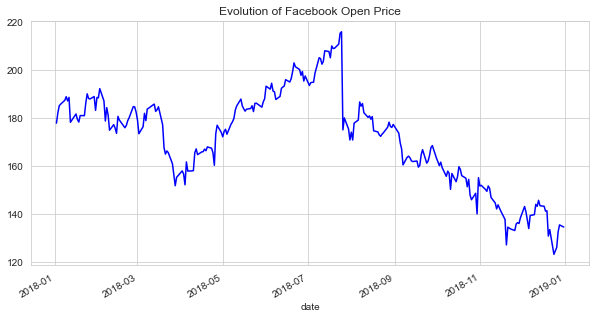

In [10]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10,5),
    style='b-',
    legend=False,
    title='Evolution of Facebook Open Price'
)

Alternatively, we can pass in the line style, marker, or color as seperate arguments.


<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

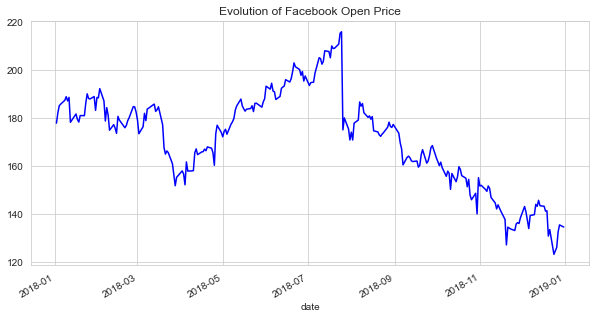

In [11]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

In addition to this, we can plot multiple datasets at once. See below how we plot 4 lines at the same itme.

<AxesSubplot:title={'center':'Facebook OHLC Prices during Jan 2018'}, xlabel='date'>

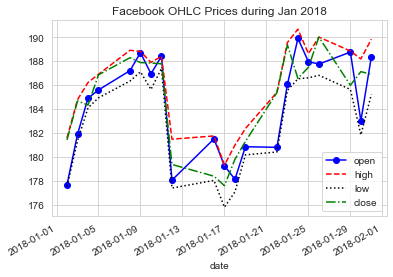

In [26]:
fb.loc['2018-01'].plot(
    y=['open', 'high', 'low', 'close'],
    style=['b-o', 'r--', 'k:', 'g-.'],
    title='Facebook OHLC Prices during Jan 2018'
)

We don't have to pass in alternatively, if we don't pass in anything for x and y, pandas will plot all the data that it can as unique lines. Additionally, we can create subplots for each of the lines just by passing in `subplot=True` and defining the layout.

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

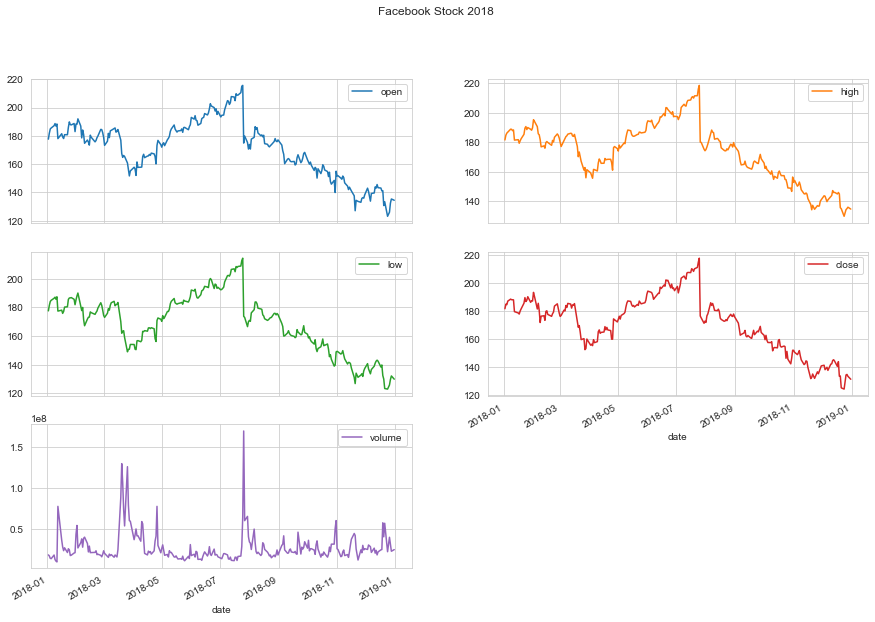

In [27]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3,2),
    figsize=(15,10),
    title='Facebook Stock 2018'
)

The `plot` function can plot a wide variety of types of graphs. The only difference we need to take into account is the keyword argument `kind`. Below is an example of a scatter plot.

<AxesSubplot:title={'center':'Facebook High vs Low'}, xlabel='high', ylabel='low'>

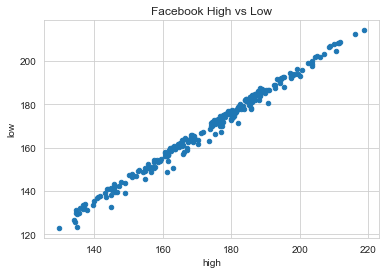

In [29]:
fb.plot(
    kind='scatter',
    x='high',
    y='low',
    title='Facebook High vs Low'
)

Another important plot type for statistical analysis is the Box plot. Once again, all we need to do is present the dataframe that we want to plot, and define `kind`.

<AxesSubplot:title={'center':'Facebook OHLC Prices Boxplot'}>

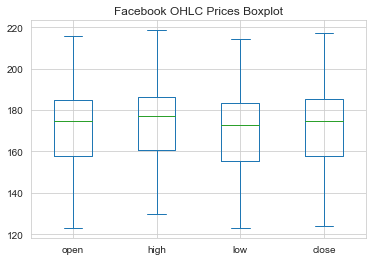

In [30]:
fb[['open', 'high', 'low', 'close']].plot(
    kind='box',
    title='Facebook OHLC Prices Boxplot'
)